# Effect of SoR Orientation (α)

In [2]:
using CSV
using DataFrames
using Statistics: mean
using Plots
using Printf

In [3]:
default(
    fontfamily="Arial",
    titlefontsize=16,
    guidefontsize=14,
    tickfontsize=11,
    legendfontsize=11,
    lw = 2,
    margin=5Plots.mm,
    dpi=600,
);

In [4]:
files = [
    # "log/20250218_113742.csv", "log/20250218_113756.csv",
    # "log/20250220_070905.csv", "log/20250220_070912.csv", "log/20250220_070920.csv", "log/20250220_070931.csv",
    # "log/20250220_114327.csv", "log/20250220_114335.csv", "log/20250220_114344.csv", "log/20250220_114356.csv",
    "log/20250818_155259.csv", "log/20250818_155310.csv",
]
dfs = [CSV.read(file, DataFrame) for file in files]
df = vcat(dfs...)
@show names(df), size(df)

grouping_cols = setdiff(names(df), ["trial", "mean_ϕC", "std_ϕC"])

df = combine(groupby(df, grouping_cols)) do subdf
    n = subdf.trial       # Number of trials
    mu = subdf.mean_ϕC    # Mean cooperation rate for each group
    sigma = subdf.std_ϕC  # Standard deviation for each group

    # Overall mean (weighted by the number of trials)
    mu_total = sum(n .* mu) / sum(n)

    # Overall standard deviation (aggregated variance)
    V_total = sum(n .* (sigma .^ 2)) / sum(n) + sum(n .* (mu .- mu_total) .^ 2) / sum(n)
    sigma_total = sqrt(V_total)

    # Return the aggregated results
    (trial = sum(n), mean_ϕC = mu_total, std_ϕC = sigma_total)
end |> sort
@show names(df), size(df)

combine(
    groupby(df, [:prob_EV, :sor_orientation]),
    :trial => mean => :trial,
    :trial => length => :count
)

(names(df), size(df)) = (["dims", "periodic_space", "distance_metric", "N", "ϕC0", "prob_EV", "λ", "cycle", "sor_vec", "T", "S", "prob_move", "sor_orientation", "x0", "μ", "generation", "trial", "mean_ϕC", "std_ϕC"], (242, 19))
(names(df), size(df)) = (["dims", "periodic_space", "distance_metric", "N", "ϕC0", "prob_EV", "λ", "cycle", "sor_vec", "T", "S", "prob_move", "sor_orientation", "x0", "μ", "generation", "trial", "mean_ϕC", "std_ϕC"], (121, 19))


Row,prob_EV,sor_orientation,trial,count
,Float64,Float64,Float64,Int64
1,0.0,0.0,100.0,1
2,0.0,0.1,100.0,1
3,0.0,0.2,100.0,1
4,0.0,0.3,100.0,1
5,0.0,0.4,100.0,1
6,0.0,0.5,100.0,1
7,0.0,0.6,100.0,1
8,0.0,0.7,100.0,1
9,0.0,0.8,100.0,1


# Line graph

In [6]:
colors = [:black, palette(:tab10)...]
palette(colors)

N=1000, 2-SoR, T=1.2, S=-0.2, pMV=1.0
xlabel = pSoR, ylabel = ϕC


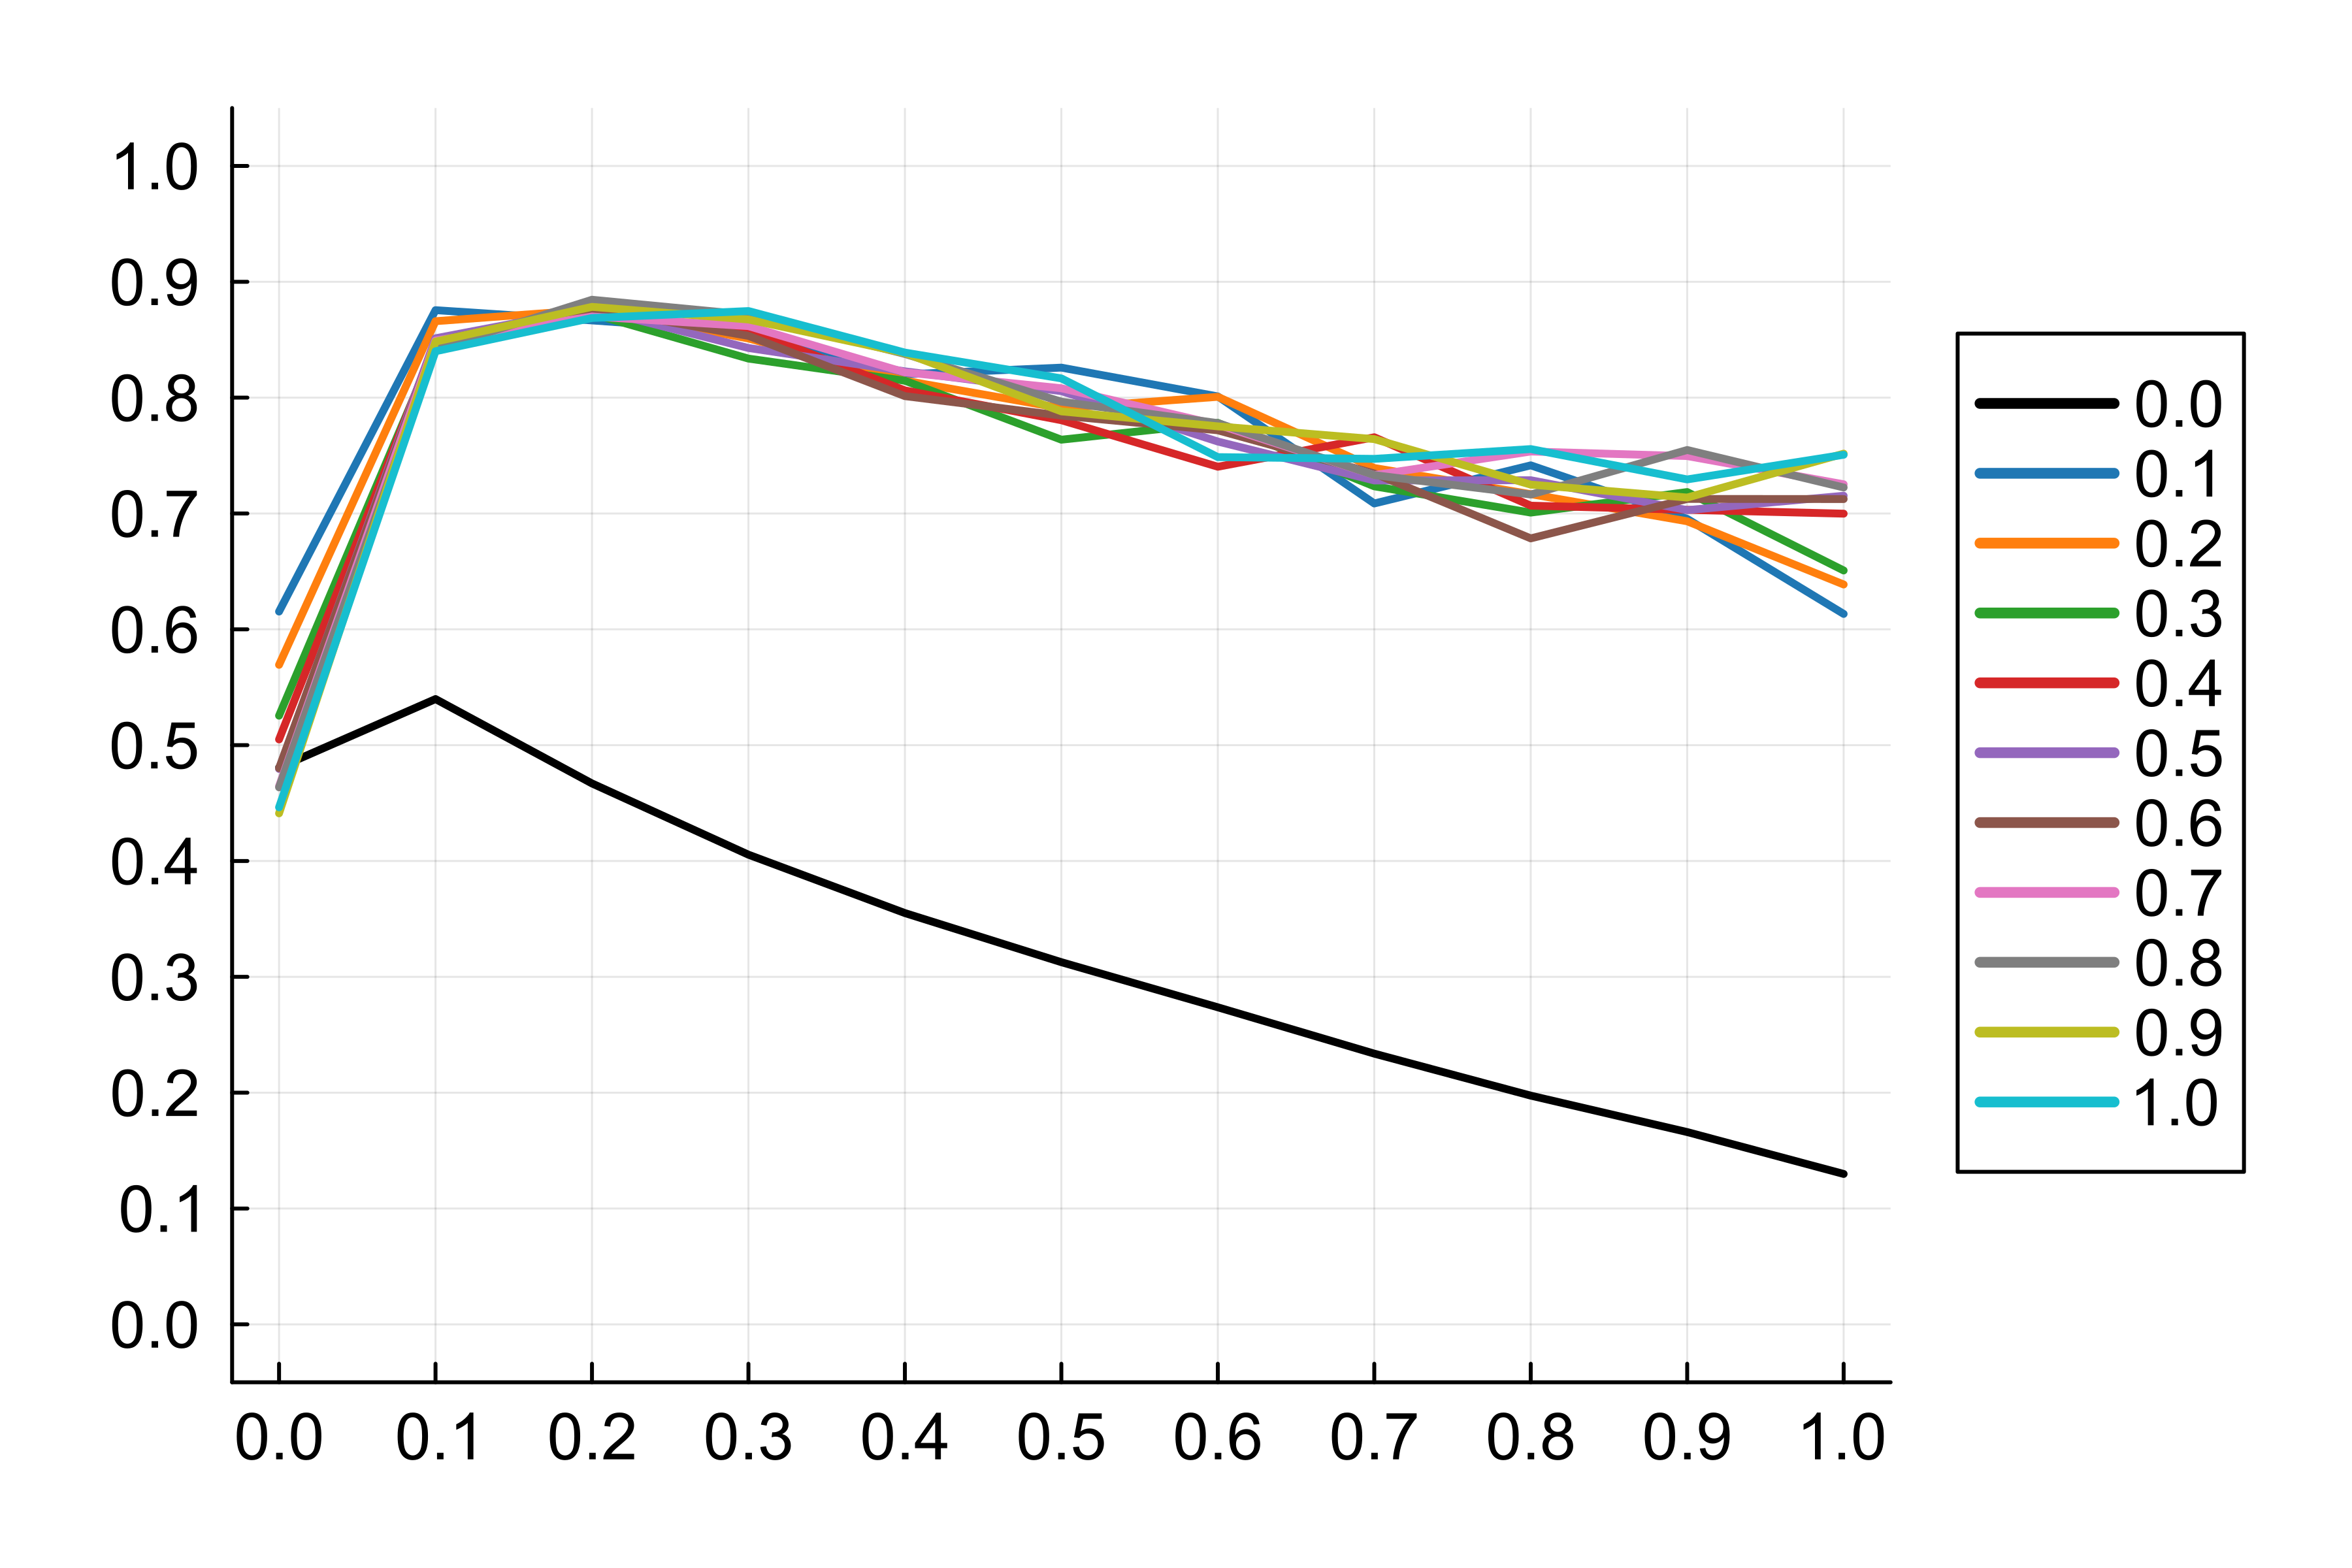

In [7]:
title_sor = length(df.sor_vec[1]) >= 13 ? "2-SoR" : "1-SoR"
title = "N=$(df.N[1]), $(title_sor), T=$(df.T[1]), S=$(df.S[1]), pMV=$(df.prob_move[1])"

p = plot(
    legend = :outerright,
    xticks = 0:0.1:1,
    ylim = (-0.05, 1.05),
    yticks = 0:0.1:1,
)

grouping_cols = setdiff(names(df), ["sor_orientation", "trial", "mean_ϕC", "std_ϕC"])

for (i, _df) in enumerate(groupby(sort(df), grouping_cols))
    line_label = "$(_df.prob_EV[1])"
    plot!(_df.sor_orientation, _df.mean_ϕC, label = line_label, color = colors[i])
end

println(title)
println("xlabel = pSoR, ylabel = ϕC")
display(p)
savefig("img/Fig_6_pSoR.png");